In [1]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from pandas import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2



In [2]:

file_path = '/content/drive/MyDrive/Flockery/val.json'

# Открываем файл и загружаем данные
with open(file_path, 'r') as file:
    data = json.load(file)


In [3]:
df = pd.DataFrame(data.values(), data.keys())
df = df.reset_index()
df = df.rename(columns = {'index': 'user_id'})

df

,user_id,target,features
0,user_127756,female,"{'orders': [{'site-id': 407, 'orders': [{'crea..."
1,user_127757,male,"{'orders': [{'site-id': 16, 'orders': [{'creat..."
2,user_127758,female,"{'orders': [{'site-id': 149, 'orders': [{'crea..."
3,user_127759,female,"{'orders': [{'site-id': 93, 'orders': [{'creat..."
4,user_127760,female,"{'visits': [{'site-id': 3, 'first-seen': 16836..."
...,...,...,...
27442,user_155198,female,"{'orders': [{'site-id': 7, 'orders': [{'create..."
27443,user_155199,male,"{'orders': [{'site-id': 21, 'orders': [{'creat..."
27444,user_155200,female,"{'orders': [{'site-id': 34, 'orders': [{'creat..."
27445,user_155201,male,"{'orders': [{'site-id': 218, 'orders': [{'crea..."


In [17]:
def process_dataframe(df):
    # Добавляем столбец 'length', содержащий количество элементов в словаре
    df['length'] = df['features'].apply(lambda x: sum(len(v) if isinstance(v, list) else 1 for v in x.values()))

    # Преобразуем столбец 'features' с помощью json_normalize
    df_filtered = df.join(pd.json_normalize(df['features'])).drop('features', axis='columns')

    return df_filtered
df_filtered = process_dataframe(df)
df_filtered

,user_id,target,length,orders,visits,site-meta,exchange-sessions,last-visits-in-categories
0,user_127756,female,8,"[{'site-id': 407, 'orders': [{'created-at': 16...","[{'site-id': 3, 'first-seen': 1697125590, 'las...",[{'site-id': 407}],"[{'landed-at': 1697132982, 'sites': [169, 214,...","[{'category': 'other', 'last-visit-at': 169713..."
1,user_127757,male,16,"[{'site-id': 16, 'orders': [{'created-at': 163...","[{'site-id': 3, 'first-seen': 1698423484, 'las...","[{'site-id': 16, 'recency': 1, 'frequency': 5,...","[{'landed-at': 1693508972, 'sites': [2, 169, 7...","[{'category': 'electronics', 'last-visit-at': ..."
2,user_127758,female,50,"[{'site-id': 149, 'orders': [{'created-at': 16...","[{'site-id': 391, 'first-seen': 1685615371, 'l...","[{'site-id': 391}, {'site-id': 42}, {'site-id'...",NaN,"[{'category': 'sport', 'last-visit-at': 165060..."
3,user_127759,female,34,"[{'site-id': 93, 'orders': [{'created-at': 162...","[{'site-id': 495, 'first-seen': 1687325784, 'l...","[{'site-id': 93, 'recency': 5, 'frequency': 2,...","[{'landed-at': 1697791749, 'sites': [373, 169,...","[{'category': 'furniture', 'last-visit-at': 16..."
4,user_127760,female,12,NaN,"[{'site-id': 3, 'first-seen': 1683626530, 'las...","[{'site-id': 46}, {'site-id': 29}, {'site-id':...",NaN,"[{'category': 'other', 'last-visit-at': 169765..."
...,...,...,...,...,...,...,...,...
27442,user_155198,female,22,"[{'site-id': 7, 'orders': [{'created-at': 1625...","[{'site-id': 3, 'first-seen': 1688903751, 'las...","[{'site-id': 49, 'recency': 1, 'frequency': 1,...","[{'landed-at': 1650900543, 'sites': [71, 326, ...","[{'category': 'other', 'last-visit-at': 169699..."
27443,user_155199,male,7,"[{'site-id': 21, 'orders': [{'created-at': 169...","[{'site-id': 21, 'first-seen': 1697887543, 'la...","[{'site-id': 21}, {'site-id': 17}]",NaN,"[{'category': 'hypermarket', 'last-visit-at': ..."
27444,user_155200,female,23,"[{'site-id': 34, 'orders': [{'created-at': 158...","[{'site-id': 22, 'first-seen': 1686412090, 'la...","[{'site-id': 34, 'recency': 1, 'frequency': 1,...",NaN,"[{'category': 'furniture', 'last-visit-at': 16..."
27445,user_155201,male,27,"[{'site-id': 218, 'orders': [{'created-at': 16...","[{'site-id': 555, 'first-seen': 1696063525, 'l...","[{'site-id': 218, 'recency': 1, 'frequency': 1...",NaN,"[{'category': 'other', 'last-visit-at': 169911..."


In [35]:


def process_dataframe(df):
    # Добавляем столбец 'length', содержащий количество элементов в словаре
    df['length'] = df['features'].apply(lambda x: sum(len(v) if isinstance(v, list) else 1 for v in x.values()))

    # Преобразуем столбец 'features' с помощью json_normalize
    df_filtered = df.join(pd.json_normalize(df['features'])).drop('features', axis='columns')

    return df_filtered

def explode_column(df, level_labels):
    for level in level_labels:
        df = df.explode(level, ignore_index=True)
        df = df.rename(columns={level: level+'_old'})
        df = df.join(pd.json_normalize(df[level+'_old'])).drop(level+'_old', axis='columns')
    return df


def remove_outliers(df):
    Q1 = df['length'].quantile(0.25)
    Q3 = df['length'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.2 * IQR
    upper_bound = Q3 + 1.2 * IQR
    return df[(df['length'] <= upper_bound)]

def with_outliers(df):
    Q1 = df['length'].quantile(0.25)
    Q3 = df['length'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.2 * IQR
    upper_bound = Q3 + 1.2 * IQR
    return df[(df['length'] > upper_bound)]

# Применяем первую часть кода к исходному DataFrame
df_filtered = process_dataframe(df)
'''
 #Применяем функцию для каждой группы в 'target'
df_filtered = df_filtered.groupby('target', group_keys=False).apply(remove_outliers)

# Сбрасываем индексы, чтобы получить DataFrame аналогичный исходному
df_filtered = df_filtered.reset_index(drop=True)
'''
# Применяем функцию для каждой группы в 'target'
#df_filtered_out = df_filtered.groupby('target', group_keys=False).apply(with_outliers)
# Сбрасываем индексы, чтобы получить DataFrame аналогичный исходному
#df_filtered_out = df_filtered_out.reset_index(drop=True)
#df_filtered_out = with_outliers(df_filtered)
# Выбираем нужные столбцы для df_orders
df_orders = df_filtered[['user_id', 'target', 'orders', 'length']].copy()

# Задаем метки уровней для функции explode_column
levels_labels = ['orders', 'orders', 'items']

# Применяем вторую часть кода к df_orders
df_orders_flat = explode_column(df_orders, levels_labels)

 #(комментим эту часть для получения полного DF)Применяем функцию для каждой группы в 'target'
df_orders_flat = df_orders_flat.groupby('target', group_keys=False).apply(remove_outliers)
# Сбрасываем индексы, чтобы получить DataFrame аналогичный исходному
df_orders_flat = df_orders_flat.reset_index(drop=True)


# Применяем вторую часть кода к df_orders
df_orders_flat_out = explode_column(df_orders, levels_labels)


 #Применяем функцию для каждой группы в 'target'
df_orders_flat_out = df_orders_flat_out.groupby('target', group_keys=False).apply(with_outliers)
df_orders_flat_out = df_orders_flat_out.reset_index(drop=True)


In [31]:
df_orders_flat_out

,user_id,target,length,site-id,created-at,id,count,general-category-path,brand-id
23871,user_128696,female,229,146.0,1.610799e+09,item_35313,1.0,"[4854062, 91182, 91157, 90509]",10607.0
23872,user_128696,female,229,146.0,1.610799e+09,item_424631,1.0,"[4854062, 91182, 91157, 90509]",30382.0
23873,user_128696,female,229,146.0,1.610799e+09,item_76647,1.0,"[4854062, 91182, 91157, 90509]",10607.0
23874,user_128696,female,229,146.0,1.610799e+09,item_424632,1.0,"[13239503, 13239480, 91182, 91157, 90509]",30382.0
23875,user_128696,female,229,146.0,1.637641e+09,item_424632,1.0,"[13239503, 13239480, 91182, 91157, 90509]",30382.0
...,...,...,...,...,...,...,...,...,...
804891,user_154910,male,196,194.0,1.459965e+09,item_4305,0.0,NaN,NaN
804892,user_154910,male,196,194.0,1.459965e+09,item_4305,0.0,NaN,NaN
804893,user_154910,male,196,194.0,1.461141e+09,item_4305,0.0,NaN,NaN
804894,user_154910,male,196,194.0,1.461141e+09,item_4305,0.0,NaN,NaN


In [36]:
df_orders_flat.to_parquet('/content/drive/MyDrive/Flockery/val_test.parquet')

In [34]:
df_orders_flat_out.to_parquet('/content/drive/MyDrive/Flockery/val_test_out.parquet')

In [41]:
# Добавляем столбец 'length', содержащий количество элементов в словаре
df['length'] = df['features'].apply(lambda x: sum(len(v) if isinstance(v, list) else 1 for v in x.values()))

# Группируем по столбцу 'target' и находим медианную длину строки
average_length_by_target = df.groupby('target')['length'].median()

In [8]:
#посмотрим медианную длину features по всему DF
df['length'].median()

25.0

In [ ]:
#посмотрим медиану в зависимости от пола
average_length_by_target

target
female    29.0
male      22.0
Name: length, dtype: float64

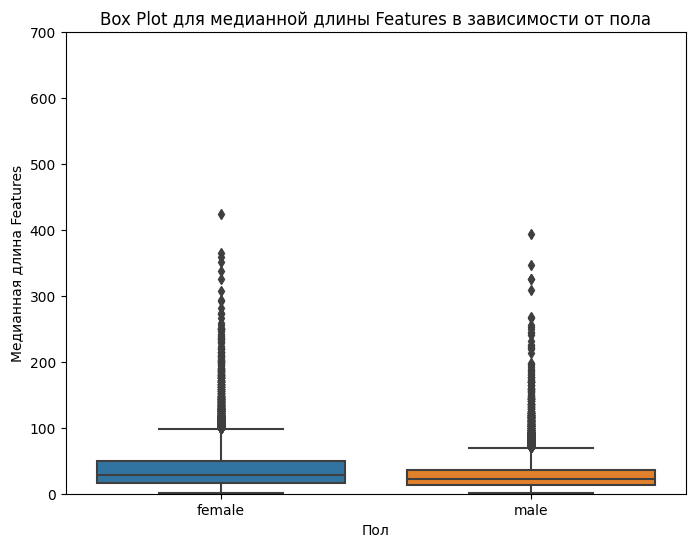

In [9]:
# Построение boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='length', data=df)
plt.title('Box Plot для медианной длины Features в зависимости от пола')
plt.xlabel('Пол')
plt.ylabel('Медианная длина Features')
plt.ylim(0, 700)

plt.show()

In [10]:
df

,user_id,target,features,length
0,user_127756,female,"{'orders': [{'site-id': 407, 'orders': [{'crea...",8
1,user_127757,male,"{'orders': [{'site-id': 16, 'orders': [{'creat...",16
2,user_127758,female,"{'orders': [{'site-id': 149, 'orders': [{'crea...",50
3,user_127759,female,"{'orders': [{'site-id': 93, 'orders': [{'creat...",34
4,user_127760,female,"{'visits': [{'site-id': 3, 'first-seen': 16836...",12
...,...,...,...,...
27442,user_155198,female,"{'orders': [{'site-id': 7, 'orders': [{'create...",22
27443,user_155199,male,"{'orders': [{'site-id': 21, 'orders': [{'creat...",7
27444,user_155200,female,"{'orders': [{'site-id': 34, 'orders': [{'creat...",23
27445,user_155201,male,"{'orders': [{'site-id': 218, 'orders': [{'crea...",27


In [11]:
#баланс классов соблюден
df['target'].value_counts()

female    13726
male      13721
Name: target, dtype: int64

In [13]:
df

,user_id,target,features,length
0,user_127756,female,"{'orders': [{'site-id': 407, 'orders': [{'crea...",8
1,user_127757,male,"{'orders': [{'site-id': 16, 'orders': [{'creat...",16
2,user_127758,female,"{'orders': [{'site-id': 149, 'orders': [{'crea...",50
3,user_127759,female,"{'orders': [{'site-id': 93, 'orders': [{'creat...",34
4,user_127760,female,"{'visits': [{'site-id': 3, 'first-seen': 16836...",12
...,...,...,...,...
27442,user_155198,female,"{'orders': [{'site-id': 7, 'orders': [{'create...",22
27443,user_155199,male,"{'orders': [{'site-id': 21, 'orders': [{'creat...",7
27444,user_155200,female,"{'orders': [{'site-id': 34, 'orders': [{'creat...",23
27445,user_155201,male,"{'orders': [{'site-id': 218, 'orders': [{'crea...",27


In [14]:
df_filtered = df.join(pd.json_normalize(df['features'])).drop('features', axis='columns')

In [15]:
df_filtered

,user_id,target,length,orders,visits,site-meta,exchange-sessions,last-visits-in-categories
0,user_127756,female,8,"[{'site-id': 407, 'orders': [{'created-at': 16...","[{'site-id': 3, 'first-seen': 1697125590, 'las...",[{'site-id': 407}],"[{'landed-at': 1697132982, 'sites': [169, 214,...","[{'category': 'other', 'last-visit-at': 169713..."
1,user_127757,male,16,"[{'site-id': 16, 'orders': [{'created-at': 163...","[{'site-id': 3, 'first-seen': 1698423484, 'las...","[{'site-id': 16, 'recency': 1, 'frequency': 5,...","[{'landed-at': 1693508972, 'sites': [2, 169, 7...","[{'category': 'electronics', 'last-visit-at': ..."
2,user_127758,female,50,"[{'site-id': 149, 'orders': [{'created-at': 16...","[{'site-id': 391, 'first-seen': 1685615371, 'l...","[{'site-id': 391}, {'site-id': 42}, {'site-id'...",NaN,"[{'category': 'sport', 'last-visit-at': 165060..."
3,user_127759,female,34,"[{'site-id': 93, 'orders': [{'created-at': 162...","[{'site-id': 495, 'first-seen': 1687325784, 'l...","[{'site-id': 93, 'recency': 5, 'frequency': 2,...","[{'landed-at': 1697791749, 'sites': [373, 169,...","[{'category': 'furniture', 'last-visit-at': 16..."
4,user_127760,female,12,NaN,"[{'site-id': 3, 'first-seen': 1683626530, 'las...","[{'site-id': 46}, {'site-id': 29}, {'site-id':...",NaN,"[{'category': 'other', 'last-visit-at': 169765..."
...,...,...,...,...,...,...,...,...
27442,user_155198,female,22,"[{'site-id': 7, 'orders': [{'created-at': 1625...","[{'site-id': 3, 'first-seen': 1688903751, 'las...","[{'site-id': 49, 'recency': 1, 'frequency': 1,...","[{'landed-at': 1650900543, 'sites': [71, 326, ...","[{'category': 'other', 'last-visit-at': 169699..."
27443,user_155199,male,7,"[{'site-id': 21, 'orders': [{'created-at': 169...","[{'site-id': 21, 'first-seen': 1697887543, 'la...","[{'site-id': 21}, {'site-id': 17}]",NaN,"[{'category': 'hypermarket', 'last-visit-at': ..."
27444,user_155200,female,23,"[{'site-id': 34, 'orders': [{'created-at': 158...","[{'site-id': 22, 'first-seen': 1686412090, 'la...","[{'site-id': 34, 'recency': 1, 'frequency': 1,...",NaN,"[{'category': 'furniture', 'last-visit-at': 16..."
27445,user_155201,male,27,"[{'site-id': 218, 'orders': [{'created-at': 16...","[{'site-id': 555, 'first-seen': 1696063525, 'l...","[{'site-id': 218, 'recency': 1, 'frequency': 1...",NaN,"[{'category': 'other', 'last-visit-at': 169911..."


In [16]:
def explode_column(df, level_labels):
    for level in level_labels:
        df = df.explode(level, ignore_index=True)
        df = df.rename(columns = {level: level+'_old'})
        df = df.join(pd.json_normalize(df[level+'_old'])).drop(level+'_old', axis='columns')
    return df

*Orders*

In [17]:
df_orders = df_filtered[['user_id', 'target', 'orders', 'length']].copy()
levels_labels = ['orders', 'orders', 'items']
df_orders_flat = explode_column(df_orders, levels_labels)
df_orders_flat

,user_id,target,length,site-id,created-at,id,count,general-category-path,brand-id
0,user_127756,female,8,407.0,1.697126e+09,item_676374,NaN,NaN,NaN
1,user_127757,male,16,16.0,1.636574e+09,item_3780263,2.0,"[90578, 90574, 198118]",1237.0
2,user_127757,male,16,16.0,1.637513e+09,item_5403882,2.0,"[90578, 90574, 198118]",1237.0
3,user_127757,male,16,16.0,1.637948e+09,item_1627033,1.0,"[91498, 91497, 91461, 198119]",1.0
4,user_127757,male,16,16.0,1.638631e+09,item_554781,1.0,"[90629, 90625, 10599873, 198119]",3519.0
...,...,...,...,...,...,...,...,...,...
815454,user_155202,female,45,53.0,1.684604e+09,item_650360,1.0,NaN,NaN
815455,user_155202,female,45,53.0,1.684604e+09,item_650361,1.0,NaN,NaN
815456,user_155202,female,45,54.0,1.420435e+09,NaN,NaN,NaN,NaN
815457,user_155202,female,45,300.0,1.688068e+09,item_650362,1.0,"[818863, 15068776, 7811881, 7877999]",915491.0


In [18]:
# Подсчет NaN по каждому столбцу (в итоге 55% строк не содержат информации о категориях и 63% - о брендах)
nan_count = df_orders_flat.isna().mean() * 100

# Вывод результата
print(nan_count)

user_id                   0.000000
target                    0.000000
length                    0.000000
site-id                   0.315896
created-at                0.315896
id                       11.823648
count                    22.386411
general-category-path    53.416297
brand-id                 61.134649
dtype: float64


In [19]:
df_orders_flat[df_orders_flat['general-category-path'].notna()]

,user_id,target,length,site-id,created-at,id,count,general-category-path,brand-id
1,user_127757,male,16,16.0,1.636574e+09,item_3780263,2.0,"[90578, 90574, 198118]",1237.0
2,user_127757,male,16,16.0,1.637513e+09,item_5403882,2.0,"[90578, 90574, 198118]",1237.0
3,user_127757,male,16,16.0,1.637948e+09,item_1627033,1.0,"[91498, 91497, 91461, 198119]",1.0
4,user_127757,male,16,16.0,1.638631e+09,item_554781,1.0,"[90629, 90625, 10599873, 198119]",3519.0
5,user_127757,male,16,16.0,1.641841e+09,item_1898950,1.0,"[90578, 90574, 198118]",996.0
...,...,...,...,...,...,...,...,...,...
815445,user_155202,female,45,97.0,1.696864e+09,item_650352,2.0,"[13518990, 16087732, 90813]",11506.0
815446,user_155202,female,45,53.0,1.660981e+09,item_379003,1.0,"[90518, 819027, 819000, 8475840]",13641.0
815452,user_155202,female,45,53.0,1.682604e+09,item_650358,1.0,"[14401832, 14424250, 8475840]",13642.0
815453,user_155202,female,45,53.0,1.682604e+09,item_650359,1.0,"[14401832, 14424250, 8475840]",13642.0


In [26]:
# Создание множества каегорий для 'male'
male_set_c = set(df_orders_flat[df_orders_flat['target'] == 'male']['general-category-path'].explode().unique())

# Создание множества для 'female'
female_set_c = set(df_orders_flat[df_orders_flat['target'] == 'female']['general-category-path'].explode().unique())

In [28]:
print(len(male_set_c))
print(len(female_set_c))

3011
3028


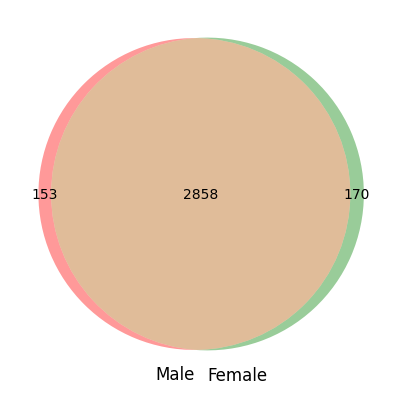

In [29]:
# Посмотрим пересечение категорий в зависимости от пола
venn2([male_set_c, female_set_c], set_labels = ('Male', 'Female'))

plt.show()

In [30]:
#посмотрим выборочно позиции уникальные для Male
unique_male_c = male_set_c - female_set_c

print(unique_male_c)
print(len(unique_male_c))

{14348801, 6275587, 91654, 91656, 13775882, 242701, 91663, 91153, 91667, 91670, 91678, 14809123, 15831084, 469553, 469554, 8308788, 6139445, 13199937, 91726, 7707222, 14730841, 15094364, 90717, 6206045, 11031140, 14912613, 14729831, 14948461, 16042606, 14454382, 857712, 152689, 13876334, 15314553, 12938362, 91772, 14443644, 15273598, 4943489, 1030275, 14716554, 15869579, 15273614, 14730895, 14979737, 91809, 15450276, 13777068, 15220918, 12251838, 431294, 14220481, 16046787, 599237, 1626822, 14211277, 14823119, 90835, 12341976, 14421210, 12341979, 15296735, 14368995, 14434533, 14955755, 191215, 289012, 90869, 15695093, 294644, 15094520, 90873, 14912763, 294652, 90877, 14222591, 14910727, 14382343, 90892, 14343439, 15143186, 90902, 90905, 12423968, 15695136, 14910755, 15094565, 14220587, 979262, 15613766, 90440, 91465, 15311178, 90443, 90956, 91468, 5047118, 90449, 434515, 434516, 1009492, 1016150, 1016152, 90460, 226667, 226668, 237421, 7962992, 16018291, 14234999, 90488, 91524, 1518989

In [37]:
#посмотрим выборочно позиции уникальные для Female
unique_female_c = female_set_c - male_set_c
print(unique_female_c)
print(len(unique_female_c))

{91648, 13052932, 819215, 78118931, 91672, 6278685, 7869470, 948265, 16033837, 13626415, 4540980, 469560, 91705, 943673, 16033851, 6206018, 91723, 4865100, 91725, 995917, 13776973, 4865101, 16066641, 14910546, 91734, 13876313, 91230, 1573474, 91235, 396899, 11031138, 13790310, 90727, 90728, 14716523, 6858863, 7746671, 15293555, 15273588, 12370553, 91776, 15093378, 14716548, 91273, 14220438, 15626392, 15314585, 13208218, 13793433, 15626396, 13021343, 10505381, 819371, 121005, 15628978, 7265976, 987834, 819390, 7851711, 14701249, 16063171, 13876421, 13792974, 90831, 13876434, 13885651, 90848, 13792992, 15988962, 950501, 14716647, 13626601, 289013, 5049591, 15524089, 90881, 5000964, 14702853, 90887, 15808778, 90891, 5057803, 15727884, 15701775, 15808783, 1574691, 15697700, 14912804, 13776164, 90926, 13120303, 16057648, 6391089, 13020979, 90936, 308025, 90948, 90952, 90957, 6489422, 90447, 14415181, 90453, 13776214, 8442711, 15730012, 7797084, 90972, 1016160, 14890337, 15768420, 819046, 76

In [31]:
# Создание множества категорий, которые присутствуют в обоих множествах
common_categories = male_set_c & female_set_c
print(common_categories)
print(len(common_categories))

{819200, 819201, 819202, 819203, 12500996, 14245898, 13803531, 819214, 819217, 16039955, 15876118, 819228, 16039965, 14426144, 6979619, 14458916, 819239, 819240, 819241, 819252, 10731573, 12501046, 819254, 819253, 819255, 819266, 819267, 819268, 14368837, 819269, 15695944, 15687757, 15720526, 819280, 819281, 819282, 819283, 819284, 15687765, 6127700, 819013, 12501086, 819295, 819296, 819297, 819298, 819299, 819300, 7774309, 819302, 16056423, 819304, 11870313, 11911273, 819303, 7774311, 819301, 11911278, 10682481, 15720562, 14246003, 819316, 819315, 819317, 819319, 819318, 15687801, 10682491, 11870336, 10682497, 10682496, 15753347, 819330, 10682501, 15753350, 15720583, 15753349, 15753353, 10682506, 14246028, 14426253, 819342, 819341, 15720588, 15753361, 819346, 15753363, 15720593, 819345, 819347, 10682511, 10682513, 10682521, 15753370, 819348, 7774364, 15753372, 10682526, 819359, 4317343, 15753377, 10682532, 15753381, 966823, 15999143, 819030, 10682538, 15753386, 819372, 819370, 1529463

In [32]:
# Создание нового столбца 'num_categories', который содержит количество категорий в 'general-category-path'
df_orders_flat['num_categories'] = df_orders_flat['general-category-path'].apply(lambda x: len(x) if isinstance(x, list) else 0)


df_orders_flat

,user_id,target,length,site-id,created-at,id,count,general-category-path,brand-id,num_categories
0,user_127756,female,8,407.0,1.697126e+09,item_676374,NaN,NaN,NaN,0
1,user_127757,male,16,16.0,1.636574e+09,item_3780263,2.0,"[90578, 90574, 198118]",1237.0,3
2,user_127757,male,16,16.0,1.637513e+09,item_5403882,2.0,"[90578, 90574, 198118]",1237.0,3
3,user_127757,male,16,16.0,1.637948e+09,item_1627033,1.0,"[91498, 91497, 91461, 198119]",1.0,4
4,user_127757,male,16,16.0,1.638631e+09,item_554781,1.0,"[90629, 90625, 10599873, 198119]",3519.0,4
...,...,...,...,...,...,...,...,...,...,...
815454,user_155202,female,45,53.0,1.684604e+09,item_650360,1.0,NaN,NaN,0
815455,user_155202,female,45,53.0,1.684604e+09,item_650361,1.0,NaN,NaN,0
815456,user_155202,female,45,54.0,1.420435e+09,NaN,NaN,NaN,NaN,0
815457,user_155202,female,45,300.0,1.688068e+09,item_650362,1.0,"[818863, 15068776, 7811881, 7877999]",915491.0,4


In [35]:
df_orders_flat['num_common_categories'] = df_orders_flat['general-category-path'].apply(lambda x: len(set(x).intersection(common_categories)) if isinstance(x, list) else 0)
df_orders_flat



,user_id,target,length,site-id,created-at,id,count,general-category-path,brand-id,num_categories,num_common_categories
0,user_127756,female,8,407.0,1.697126e+09,item_676374,NaN,NaN,NaN,0,0
1,user_127757,male,16,16.0,1.636574e+09,item_3780263,2.0,"[90578, 90574, 198118]",1237.0,3,3
2,user_127757,male,16,16.0,1.637513e+09,item_5403882,2.0,"[90578, 90574, 198118]",1237.0,3,3
3,user_127757,male,16,16.0,1.637948e+09,item_1627033,1.0,"[91498, 91497, 91461, 198119]",1.0,4,4
4,user_127757,male,16,16.0,1.638631e+09,item_554781,1.0,"[90629, 90625, 10599873, 198119]",3519.0,4,4
...,...,...,...,...,...,...,...,...,...,...,...
815454,user_155202,female,45,53.0,1.684604e+09,item_650360,1.0,NaN,NaN,0,0
815455,user_155202,female,45,53.0,1.684604e+09,item_650361,1.0,NaN,NaN,0,0
815456,user_155202,female,45,54.0,1.420435e+09,NaN,NaN,NaN,NaN,0,0
815457,user_155202,female,45,300.0,1.688068e+09,item_650362,1.0,"[818863, 15068776, 7811881, 7877999]",915491.0,4,4


In [38]:
# Создание новых столбцов
df_orders_flat['male_cat'] = df_orders_flat['general-category-path'].apply(lambda x: 1 if isinstance(x, list) and any(item in x for item in unique_male_c) else 0)
df_orders_flat['female_cat'] = df_orders_flat['general-category-path'].apply(lambda x: 1 if isinstance(x, list) and any(item in x for item in unique_female_c) else 0)
df_orders_flat

,user_id,target,length,site-id,created-at,id,count,general-category-path,brand-id,num_categories,num_common_categories,male_cat,female_cat
0,user_127756,female,8,407.0,1.697126e+09,item_676374,NaN,NaN,NaN,0,0,0,0
1,user_127757,male,16,16.0,1.636574e+09,item_3780263,2.0,"[90578, 90574, 198118]",1237.0,3,3,0,0
2,user_127757,male,16,16.0,1.637513e+09,item_5403882,2.0,"[90578, 90574, 198118]",1237.0,3,3,0,0
3,user_127757,male,16,16.0,1.637948e+09,item_1627033,1.0,"[91498, 91497, 91461, 198119]",1.0,4,4,0,0
4,user_127757,male,16,16.0,1.638631e+09,item_554781,1.0,"[90629, 90625, 10599873, 198119]",3519.0,4,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
815454,user_155202,female,45,53.0,1.684604e+09,item_650360,1.0,NaN,NaN,0,0,0,0
815455,user_155202,female,45,53.0,1.684604e+09,item_650361,1.0,NaN,NaN,0,0,0,0
815456,user_155202,female,45,54.0,1.420435e+09,NaN,NaN,NaN,NaN,0,0,0,0
815457,user_155202,female,45,300.0,1.688068e+09,item_650362,1.0,"[818863, 15068776, 7811881, 7877999]",915491.0,4,4,0,0


In [39]:
df_orders_flat[df_orders_flat['female_cat'] == 1]

,user_id,target,length,site-id,created-at,id,count,general-category-path,brand-id,num_categories,num_common_categories,male_cat,female_cat
1706,user_127820,female,120,141.0,1.556268e+09,item_5410307,1.0,"[13876434, 13946516, 90497, 90402]",3247.0,4,3,0,1
5395,user_127956,female,115,80.0,1.549948e+09,item_424135,1.0,"[15727884, 91377, 91374, 91307]",NaN,4,3,0,1
5397,user_127956,female,115,80.0,1.549948e+09,item_2885584,8.0,"[15727884, 91377, 91374, 91307]",NaN,4,3,0,1
5570,user_127958,female,41,20.0,1.589441e+09,item_4916194,1.0,"[91595, 91594, 10616651, 91512]",4534.0,4,2,0,1
5571,user_127958,female,41,20.0,1.589441e+09,item_4916195,1.0,"[1016160, 91594, 10616651, 91512]",23755.0,4,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
808797,user_155032,female,47,20.0,1.674735e+09,item_6163166,1.0,"[4767715, 91763]",1935470.0,2,1,0,1
809281,user_155036,female,359,162.0,1.542974e+09,item_2775401,1.0,"[995917, 995914, 90813]",NaN,3,2,0,1
809791,user_155036,female,359,16.0,1.556282e+09,item_9142,1.0,"[308025, 10604368, 91009]",940.0,3,2,0,1
811948,user_155088,female,90,162.0,1.542986e+09,item_4895587,1.0,"[91555, 91549, 10616651, 91512]",NaN,4,3,0,1


In [40]:
df_orders_flat.to_parquet('/content/drive/MyDrive/Flockery/val_test.parquet')